In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Defining global plot aesthetics for consistency
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("talk") 

In [4]:
# Function to show the missing data and pre-process the dataset
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    print("Initial Missing Data Report:")
    missing_count = df.isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    
    for col in df.columns:
        print(f"{col}: {missing_count[col]} missing values ({missing_percentage[col]:.2f}%)")

    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            if missing_count[col] > 0:
                mean_value = df[col].mean()
                df[col].fillna(mean_value, inplace=True)
                print(f"Filled missing numerical values in '{col}' with the mean: {mean_value:.2f}")
        elif df[col].dtype == 'object':
            if missing_count[col] > 0:
                mode_value = df[col].mode()[0]
                df[col].fillna(mode_value, inplace=True)
                print(f"Filled missing categorical values in '{col}' with the mode: {mode_value}")

    return df

In [5]:
# Loading the dataset
file_path = 'weather_test_data.csv'
df = load_and_preprocess_data(file_path)

Initial Missing Data Report:
row ID: 0 missing values (0.00%)
Location: 0 missing values (0.00%)
MinTemp: 194 missing values (0.45%)
MaxTemp: 92 missing values (0.22%)
Rainfall: 427 missing values (1.00%)
Evaporation: 18312 missing values (42.91%)
Sunshine: 20499 missing values (48.03%)
WindGustDir: 2809 missing values (6.58%)
WindGustSpeed: 2790 missing values (6.54%)
WindDir9am: 3007 missing values (7.05%)
WindDir3pm: 1130 missing values (2.65%)
WindSpeed9am: 413 missing values (0.97%)
WindSpeed3pm: 795 missing values (1.86%)
Humidity9am: 541 missing values (1.27%)
Humidity3pm: 1104 missing values (2.59%)
Pressure9am: 4266 missing values (10.00%)
Pressure3pm: 4245 missing values (9.95%)
Cloud9am: 16085 missing values (37.69%)
Cloud3pm: 17092 missing values (40.05%)
Temp9am: 290 missing values (0.68%)
Temp3pm: 822 missing values (1.93%)
RainToday: 427 missing values (1.00%)
Filled missing numerical values in 'MinTemp' with the mean: 12.21
Filled missing numerical values in 'MaxTemp' w

In [6]:
unique_locations = df['Location'].unique()
for location in unique_locations:
    print(location)
print(f"There are {df['Location'].nunique()} locations in the dataset.")

Albury
BadgerysCreek
Cobar
CoffsHarbour
Moree
Newcastle
NorahHead
NorfolkIsland
Penrith
Richmond
Sydney
SydneyAirport
WaggaWagga
Williamtown
Wollongong
Canberra
Tuggeranong
MountGinini
Ballarat
Bendigo
Sale
MelbourneAirport
Melbourne
Mildura
Nhil
Portland
Watsonia
Dartmoor
Brisbane
Cairns
GoldCoast
Townsville
Adelaide
MountGambier
Nuriootpa
Woomera
Albany
Witchcliffe
PearceRAAF
PerthAirport
Perth
SalmonGums
Walpole
Hobart
Launceston
AliceSprings
Darwin
Katherine
Uluru
There are 49 locations in the dataset.


In [7]:
# Displaying basic properties and any other descriptive information
df.info()
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42677 entries, 0 to 42676
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         42677 non-null  object 
 1   Location       42677 non-null  object 
 2   MinTemp        42677 non-null  float64
 3   MaxTemp        42677 non-null  float64
 4   Rainfall       42677 non-null  float64
 5   Evaporation    42677 non-null  float64
 6   Sunshine       42677 non-null  float64
 7   WindGustDir    42677 non-null  object 
 8   WindGustSpeed  42677 non-null  float64
 9   WindDir9am     42677 non-null  object 
 10  WindDir3pm     42677 non-null  object 
 11  WindSpeed9am   42677 non-null  float64
 12  WindSpeed3pm   42677 non-null  float64
 13  Humidity9am    42677 non-null  float64
 14  Humidity3pm    42677 non-null  float64
 15  Pressure9am    42677 non-null  float64
 16  Pressure3pm    42677 non-null  float64
 17  Cloud9am       42677 non-null  float64
 18  Cloud3

,count,mean,std,min,25%,50%,75%,max
MinTemp,42677.0,12.210032,6.417485,-8.2,7.600000,12.100000,16.900000,31.8
MaxTemp,42677.0,23.246068,7.115914,-4.8,18.000000,22.700000,28.300000,47.0
Rainfall,42677.0,2.342862,8.369916,0.0,0.000000,0.000000,0.800000,278.4
Evaporation,42677.0,5.489715,3.210360,0.0,4.000000,5.489715,5.489715,145.0
Sunshine,42677.0,7.647831,2.723477,0.0,7.647831,7.647831,8.700000,14.3
WindGustSpeed,42677.0,40.001379,13.153646,7.0,31.000000,39.000000,46.000000,122.0
WindSpeed9am,42677.0,13.995315,8.829409,0.0,7.000000,13.000000,19.000000,74.0
WindSpeed3pm,42677.0,18.607516,8.724499,0.0,13.000000,18.607516,24.000000,83.0
Humidity9am,42677.0,68.791176,18.875325,1.0,57.000000,70.000000,83.000000,100.0
Humidity3pm,42677.0,51.597672,20.573142,1.0,37.000000,51.597672,65.000000,100.0


In [20]:
# Function to plot a scatter plot
def plot_scatter(data, x, y, hue, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, hue=hue, data=data, palette='Set1', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=hue)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


# First, let's melt the DataFrame to long-form for plotting

df_long = df.melt(id_vars=['RainToday'], 
                  value_vars=['Cloud9am', 'Cloud3pm'], 
                  var_name='TimeOfDay', 
                  value_name='CloudCover')



# Creating a violin plot with seaborn

def plot_side_by_side_violin(data, x, y, hue, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=hue, y=y, hue=x, data=data, split=True, palette='pastel')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=xlabel)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


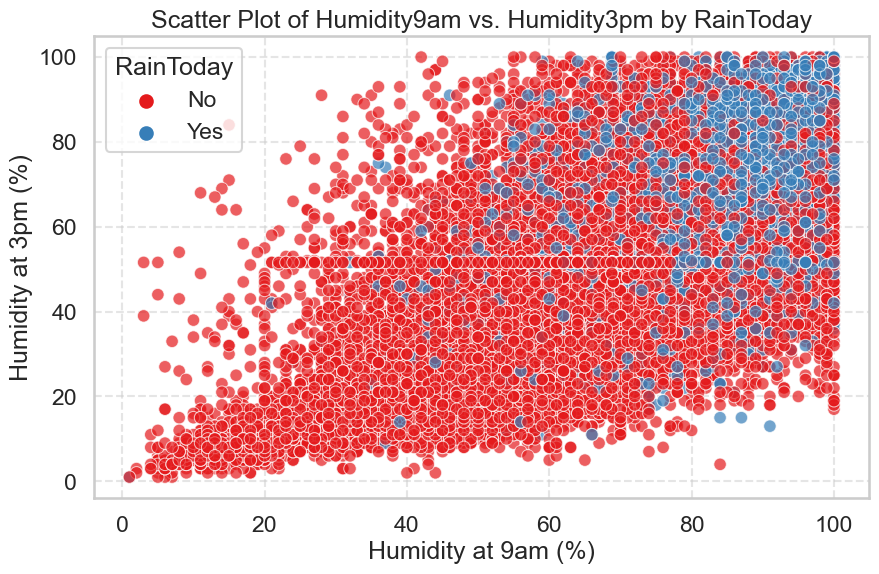

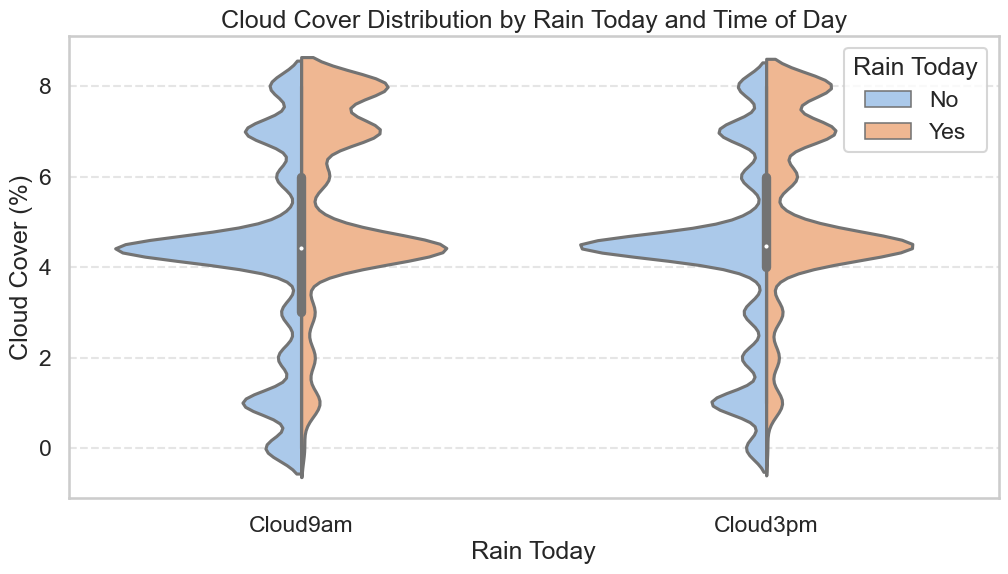

In [21]:
# Creating a scatter plot
plot_scatter(df, 'Humidity9am', 'Humidity3pm', 'RainToday', 
             'Scatter Plot of Humidity9am vs. Humidity3pm by RainToday', 
             'Humidity at 9am (%)', 'Humidity at 3pm (%)')
             
# Calling the function with the updated DataFrame

plot_side_by_side_violin(df_long, 'RainToday', 'CloudCover', 'TimeOfDay',
                         'Cloud Cover Distribution by Rain Today and Time of Day',
                         'Rain Today', 'Cloud Cover (%)')

In [26]:
# Function to plot side by side box plots with increased figure size
def plot_box_side_by_side(data, categories, metrics, title):
    # Increasing the overall figure size
    fig, axes = plt.subplots(1, len(metrics), figsize=(15, 10), sharey=True)  # Width, Height in inches
    
    for ax, metric in zip(axes, metrics):
        sns.boxplot(x=categories, y=metric, data=data, ax=ax, palette=['lightblue', 'lightcoral'])
        ax.set_title(f'{metric} Distribution on Days with and without Rain', fontsize=16)
        ax.set_xlabel('Rain Today', fontsize=14)
        ax.set_ylabel(metric, fontsize=14)
        ax.grid(axis='y', linestyle='--', alpha=0.3)
        # Increasing the size of the tick labels for better readability
        ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Adjusting the overall title size
    plt.suptitle(title, fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
    plt.show()


# Function to create scatter plot with regression line
def plot_regression(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x, y=y, data=data, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

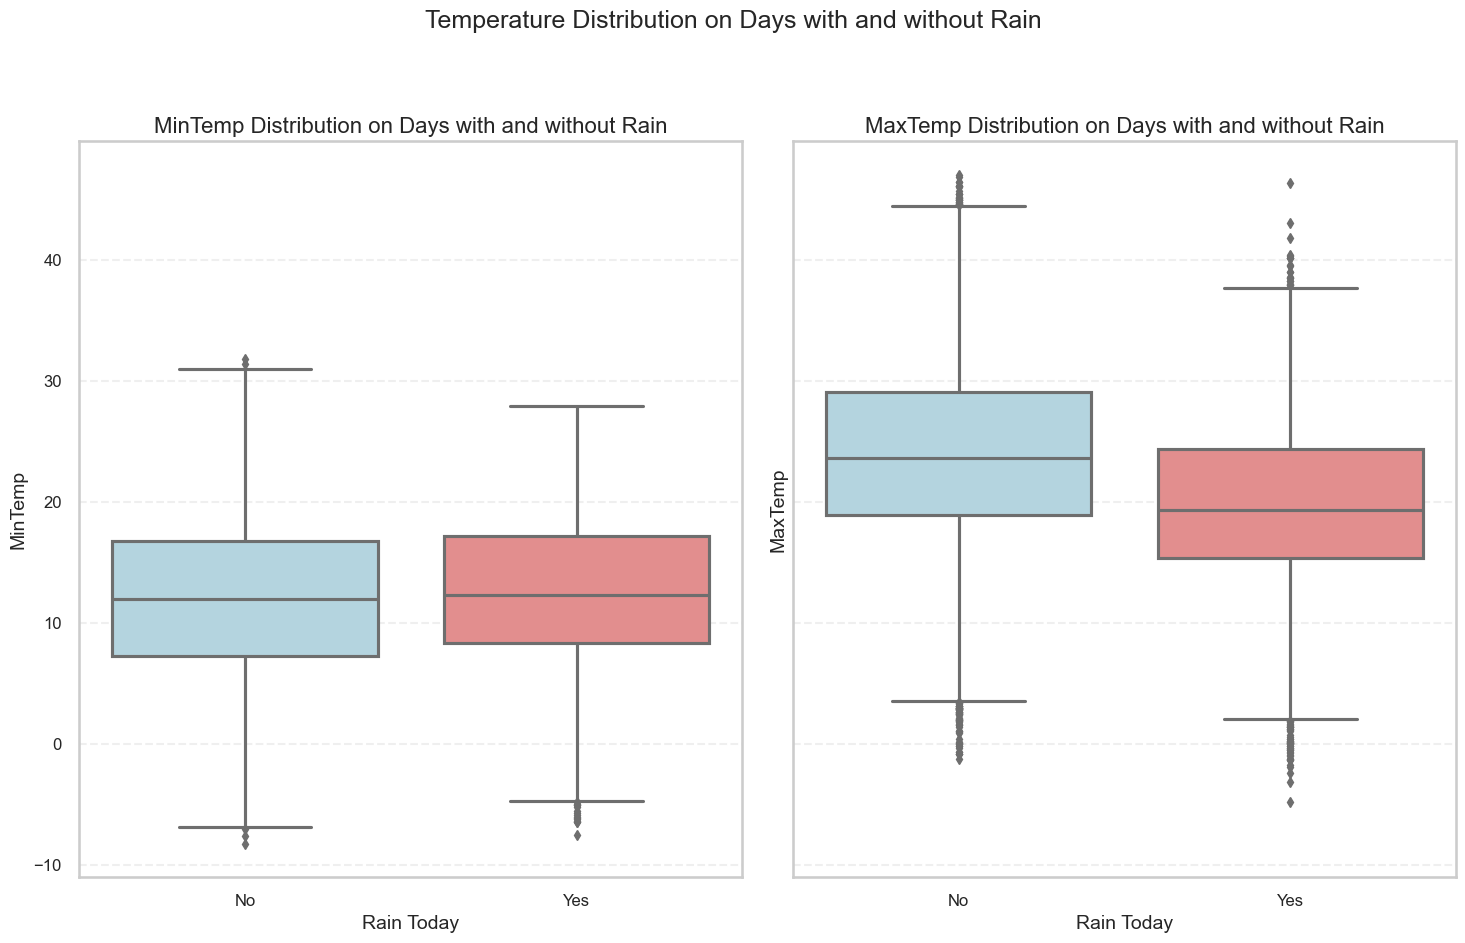

In [27]:
# Calling the updated function with increased size
plot_box_side_by_side(df, 'RainToday', ['MinTemp', 'MaxTemp'], 'Temperature Distribution on Days with and without Rain')

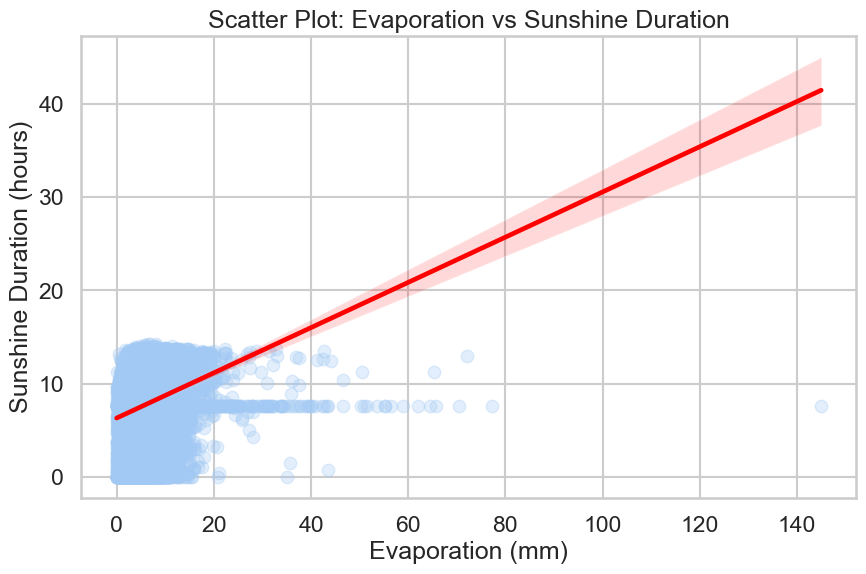

In [12]:
# Plotting Evaporation vs. Sunshine with a regression line
plot_regression(df, 'Evaporation', 'Sunshine', 'Scatter Plot: Evaporation vs Sunshine Duration', 'Evaporation (mm)', 'Sunshine Duration (hours)')

c:\Users\aakpk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


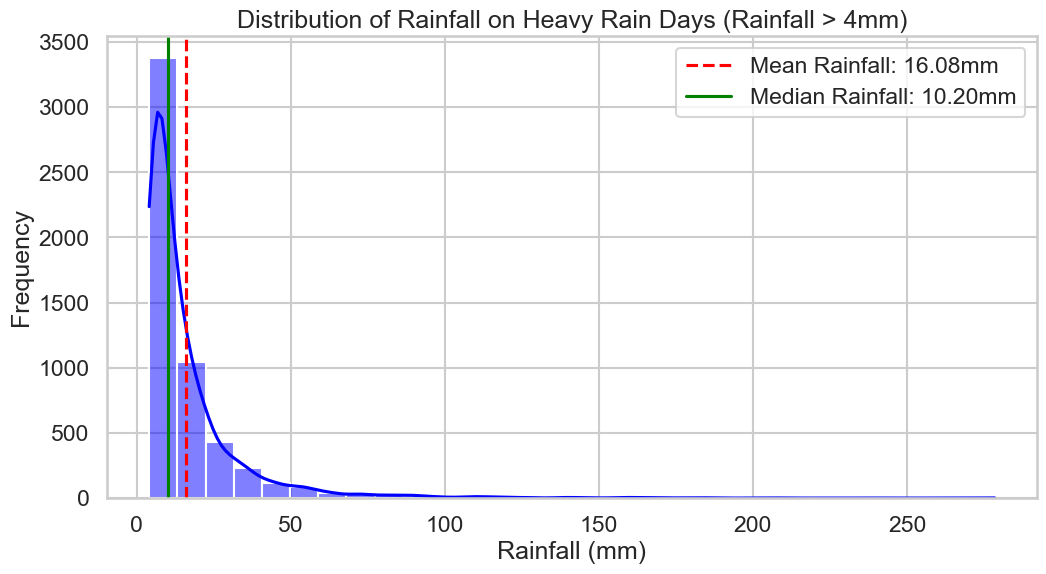

In [34]:

# Setting the threshold for heavy rain
heavy_rain_threshold = 4.0

# Calculating the number of days with heavy rain
heavy_rain_days = df[df['Rainfall'] > heavy_rain_threshold]

# Calculating the median rainfall on heavy rain days
median_rainfall = heavy_rain_days['Rainfall'].median()

# Creating the histogram plot
plt.figure(figsize=(12, 6))
sns.histplot(heavy_rain_days['Rainfall'], bins=30, kde=True, color='blue')
plt.title('Distribution of Rainfall on Heavy Rain Days (Rainfall > 4mm)')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')

# Plotting the mean and median lines
plt.axvline(heavy_rain_days['Rainfall'].mean(), color='red', linestyle='--', label=f"Mean Rainfall: {heavy_rain_days['Rainfall'].mean():.2f}mm")
plt.axvline(median_rainfall, color='green', linestyle='-', label=f"Median Rainfall: {median_rainfall:.2f}mm")

# Adding the legend
plt.legend()
plt.show()


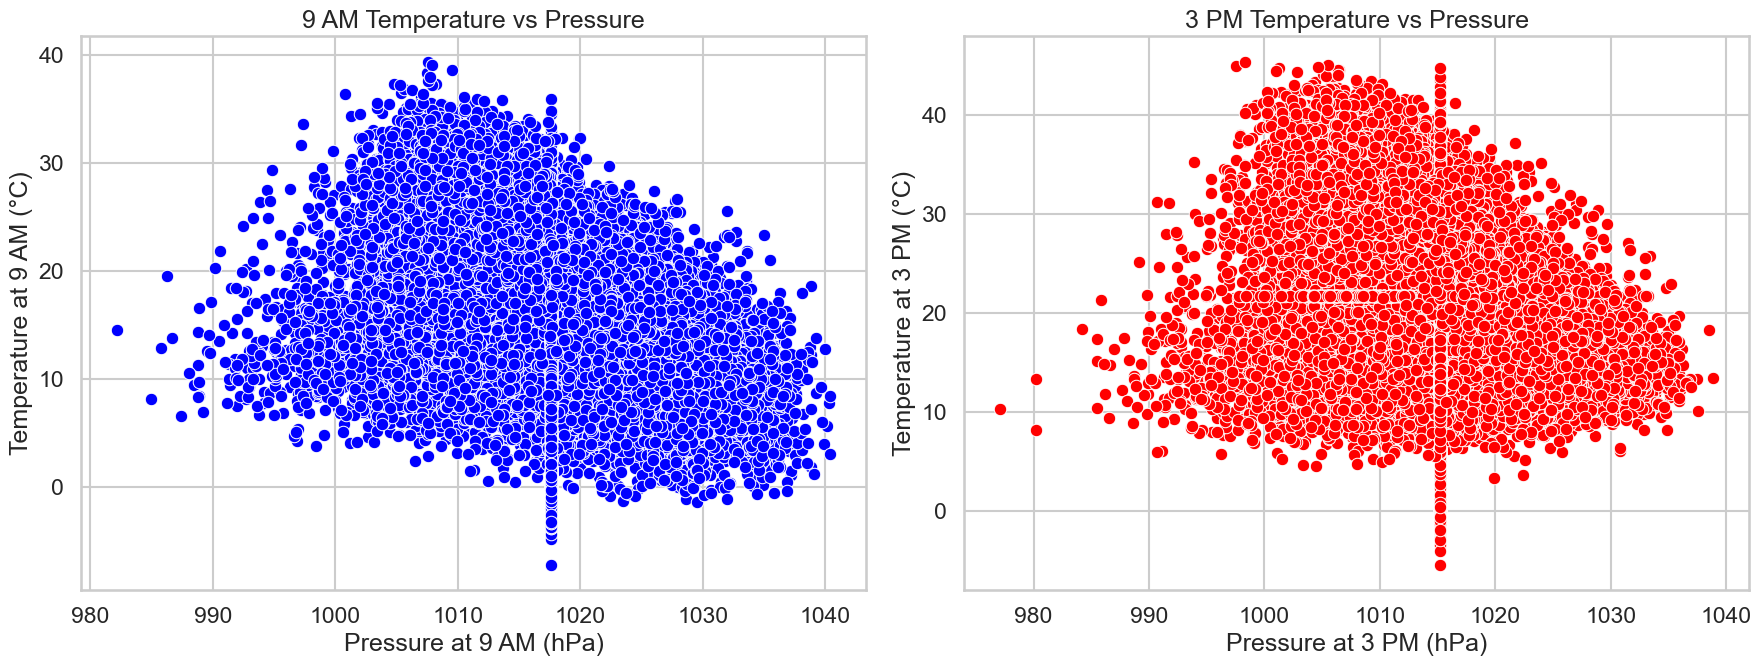

In [55]:
# Setting up a matplotlib figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Scatter plot for 9 AM temperature vs pressure
sns.scatterplot(x='Pressure9am', y='Temp9am', data=df, ax=ax1, color='blue')
ax1.set_title('9 AM Temperature vs Pressure')
ax1.set_xlabel('Pressure at 9 AM (hPa)')
ax1.set_ylabel('Temperature at 9 AM (°C)')

# Scatter plot for 3 PM temperature vs pressure
sns.scatterplot(x='Pressure3pm', y='Temp3pm', data=df, ax=ax2, color='red')
ax2.set_title('3 PM Temperature vs Pressure')
ax2.set_xlabel('Pressure at 3 PM (hPa)')
ax2.set_ylabel('Temperature at 3 PM (°C)')

# Displaying the plots
plt.tight_layout()
plt.show()